# Homework Assignment II

Name: **Victoria Peterson**

ID: **15476758**

Course: “Performance of Networked Systems”, Block II, 2024

Lecturer: Prof.dr. Rob van der Mei

Teacher Assistant: Ritul Satish

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## I : Traffic Management in IP networks

During the lecture on IP Traffic Management, two important methods to regulate incoming traffic were
discussed: (1) traffic shaping, and (2) traffic policing.

---

### Exercise 1

**What are the main differences traffic shaping and traffic policing?**

Traffic Shaping is a router functionality that aims to filter "bursty" traffic before entering a network by delaying packets that arrive in groups such that they arrive at a "peak-rate" $r$ rather than in immediate succession. 

This differs from Traffic Policing in a number of ways such that instead of "slowing-down" incoming packets, the router marks or discards packets that arrive at a rate higher than an agreed-upon mean rate $r$ and burst tolerance $b$. These packets are *not* delayed like they are in Traffic Shaping and the marking rules are based on individual "contracts" made with specific classes rather than overall rate limits.




---

Let us now assume that the incoming – unregulated – traffic over a 50-seconds time frame looks like the
left picture in Figure 1 below.

![Figure 1](1.png)

We first investigate the impact of traffic shaping. As discussed during the lectures, shaping functionality
may introduce delay to the incoming traffic stream when the bitrate temporarily exceeds the shaping rate.
That is, in terms of a Leaky Bucket (LB) implementation, the “water level” will then rise and introduce
delay to incoming traffic



---

### Exercise 2

**Make a graph that shows the delay induced by the shaper (i.e., the “water level”) over time. Be precise and motivate your findings**

#### Define Traffic Rate for Timespans

In [3]:
traffic = {
    (0, 10): 5,
    (15, 20): 7.5,
    (25, 50): 2.5
}

#### Define the Bitrate Limit for Traffic Shaping

In [4]:
globalRate = 3.5

#### Create Array of Shaped Traffic

In [5]:
'''
Function to create a shaped traffic array based on the rate limit
Input:
    traffic: dictionary with the traffic information
    rateLimit: rate limit to shape the traffic
'''
def trafficShaping(traffic, rateLimit):
    shapedTraffic = []
    traffic = sorted(traffic.items())

    totalTime = 0
    previousEndTime = 0

    for i in range(len(traffic)):
        time = traffic[i][0][1] - traffic[i][0][0]

        if traffic[i][1] > rateLimit:
            shapingValue = traffic[i][1]/rateLimit
        else:
            shapingValue = 1

        shapedRate = traffic[i][1]/shapingValue
        shapedTime = time*shapingValue

        initialTime = traffic[i][0][0]
        endTime =  initialTime + shapedTime

        if initialTime < totalTime:
            endTime = totalTime + shapedTime
            initialTime = totalTime

        if previousEndTime < initialTime:
            shapedTraffic.append(((previousEndTime, initialTime), 0))
        
        totalTime = endTime

        shapedTraffic.append(((initialTime, endTime), shapedRate))
        previousEndTime = endTime

    return shapedTraffic
'''
Output:
    shapedTraffic: shaped traffic array
'''

'\nOutput:\n    shapedTraffic: shaped traffic array\n'

In [6]:
shapedTraffic = trafficShaping(traffic, globalRate)

print("Shaped Traffic: ", shapedTraffic)

Shaped Traffic:  [((0, 14.285714285714286), 3.5), ((14.285714285714286, 15), 0), ((15, 25.714285714285715), 3.5), ((25.714285714285715, 50.714285714285715), 2.5)]


#### Helper Function to find Bitrate at a Specific Time

In [7]:
'''
Function to get the traffic bitrate at a specific time
Input:
    traffic: dictionary with the traffic information
    specificTime: specific time to get the traffic rate
'''
def getTrafficRate(traffic,  specificTime):
    for (start, end), rate in traffic.items():
        if start <= specificTime < end:
            return rate
    return 0.0
'''
Output:
    rate: traffic rate at the specific time
'''

'\nOutput:\n    rate: traffic rate at the specific time\n'

#### Function to find delay at every timestep of traffic

In [ ]:
'''
Function to calculate the traffic shaping delay
Input:
    traffic: dictionary with the traffic information
    shapedTraffic: shaped traffic array
'''
def trafficShapingDelay(traffic, shapedTraffic):
    timestepSize = 0.1
    currentDelay = 0.0
    timeArray = []
    delayArray = []

    for (start, end), rate in shapedTraffic:
        currentTime = start

        while currentTime < end:
            currentRate = getTrafficRate(traffic, currentTime)
            #print("Current Rate: ", currentRate)

            delayAdjustment = currentRate - rate
            #print("Delay Adjustment: ", delayAdjustment)

            currentDelay += delayAdjustment * timestepSize

            #print("Time: ", currentTime, "Rate: ", currentRate, "Delay: ", currentDelay)

            timeArray.append(currentTime)
            delayArray.append(currentDelay)

            currentTime += timestepSize

            currentTime = np.round(currentTime, 1)
    
    return timeArray, delayArray
'''
Output:
    timeArray: time array
    delayArray: delay array
'''

'\nOutput:\n    timeArray: time array\n    delayArray: delay array\n'

In [ ]:
bitRateDelayTime, bitRateDelay = trafficShapingDelay(traffic, shapedTraffic)

print("Time Array: ", bitRateDelayTime)
print("Delay Array: ", bitRateDelay)

Time Array:  [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.285714285714286, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17

#### Plot Accumulated Delay over time for Traffic Shaping

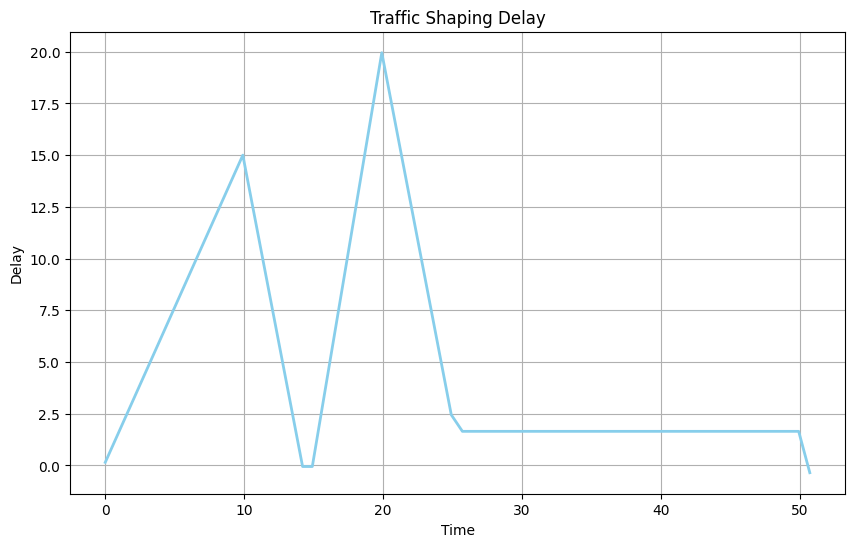

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(bitRateDelayTime, bitRateDelay, color='skyblue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Delay')
plt.title('Traffic Shaping Delay')
plt.grid(True)

plt.show()

---

### Exercise 3

**Make a graph that plots the bitrate of the shaped traffic over time. Be precise and motivate your findings.**

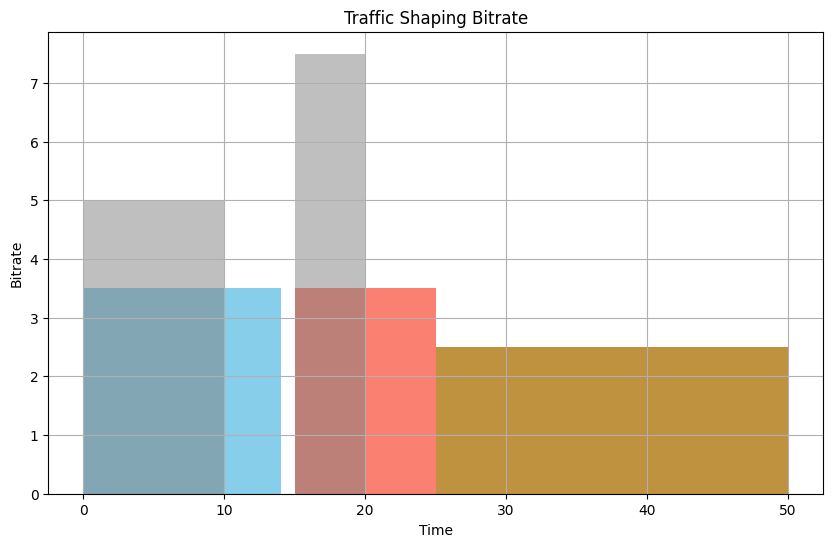

In [11]:
plt.figure(figsize=(10, 6))

colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

# Plot the shaped traffic
for idx, ((start, end), rate) in enumerate(shapedTraffic):
    color = colors[idx % len(colors)]
    for i in range(int((end - start))):
        plt.bar(int(start + i), rate, width=1, color=color, align='edge')

for (start, end), rate in traffic.items():
    for i in range(int((end - start))):
        plt.bar(int(start + i), rate, width=1, color='gray', align='edge', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Bitrate')
plt.title('Traffic Shaping Bitrate')
plt.grid(True)

plt.show()

---


### Exercise 4

Answer the same question as in questions 2 and 3, but where the shaping rate is now 1.75 Mbit/s (instead of 3.5 Mbit/s)

In [12]:
globalRate2 = 1.75

In [13]:
shapedTraffic2 = trafficShaping(traffic, globalRate2)

print("Shaped Traffic: ", shapedTraffic2)

Shaped Traffic:  [((0, 28.571428571428573), 1.75), ((28.571428571428573, 50.0), 1.75), ((50.0, 85.71428571428572), 1.75)]


In [ ]:
bitRateDelayTime2, bitRateDelay2 = trafficShapingDelay(traffic, shapedTraffic2)

print("Time Array: ", bitRateDelayTime2)
print("Delay Array: ", bitRateDelay2)

Time Array:  [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18

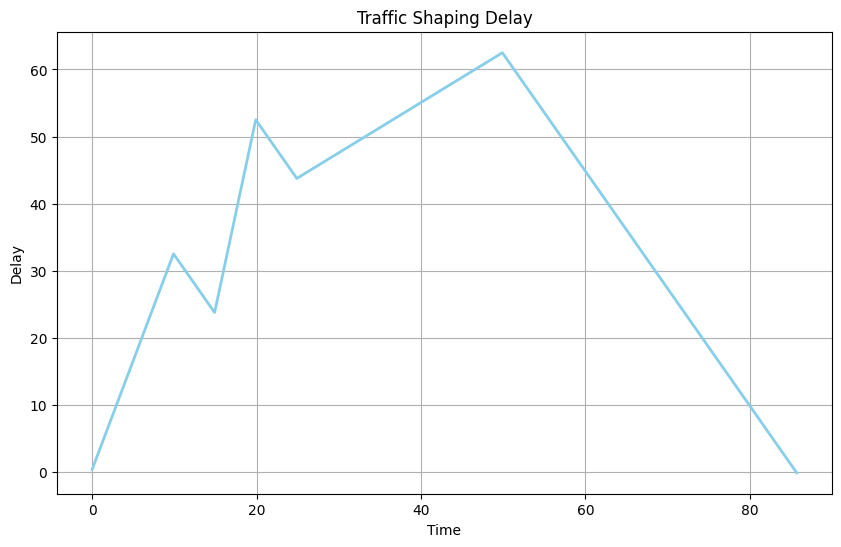

In [15]:
plt.figure(figsize=(10, 6))

plt.plot(bitRateDelayTime2, bitRateDelay2, color='skyblue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Delay')
plt.title('Traffic Shaping Delay')
plt.grid(True)

plt.show()

0 28.571428571428573 1.75
28.571428571428573 50.0 1.75
50.0 85.71428571428572 1.75


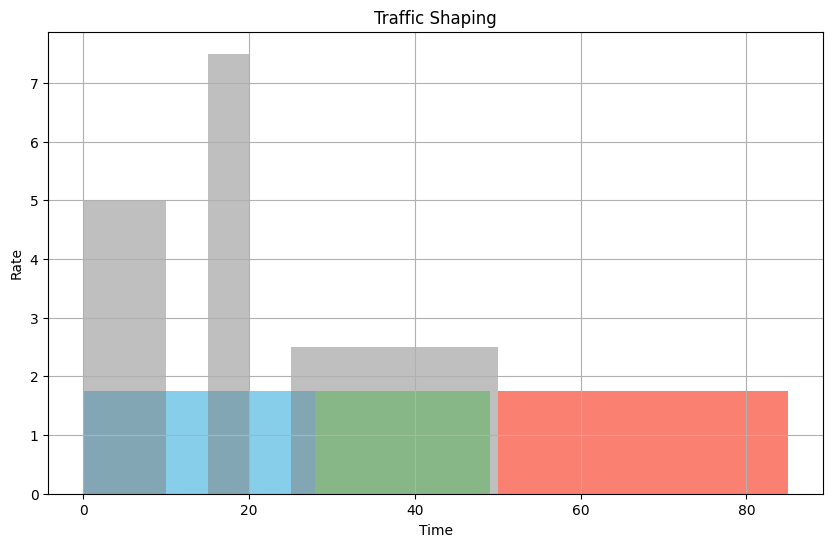

In [16]:
plt.figure(figsize=(10, 6))

colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

for idx, ((start, end), rate) in enumerate(shapedTraffic2):
    print(start, end, rate)
    color = colors[idx % len(colors)]
    for i in range(int((end - start))):
        plt.bar(int(start + i), rate, width=1, color=color, align='edge')

for (start, end), rate in traffic.items():
    for i in range(int((end - start))):
        plt.bar(int(start + i), rate, width=1, color='gray', align='edge', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Traffic Shaping')
plt.grid(True)

plt.show()

--- 
Figure 2 below illustrates the shaping functionality for a simplistic single-
burst example, and shows both the bitrate and delay induced by the shaper

![Figure 2](2.png)

Traffic policing is a filtering mechanism that checks whether incoming traffic is conforming a Service
Level Agreement (SLA), or non-conforming. Recall from the lectures that an often-used implementation of
traffic policing is the LB implementation, which is characterized by two parameters: (1) the leak rate r, and
(2) the burst tolerance b

Let us assume that the leak rate of r = 3.5 Mbit/s and the burst tolerance b = 1 Mbyte.

#### Parameters

In [93]:
leakRate = 3.5

burstTolerance = 8

timestepSize = 0.1

---

### Exercise 5

**Make a graph that plots the bitrate of the policed traffic over time**

0 10 5
15 20 7.5
25 50 2.5


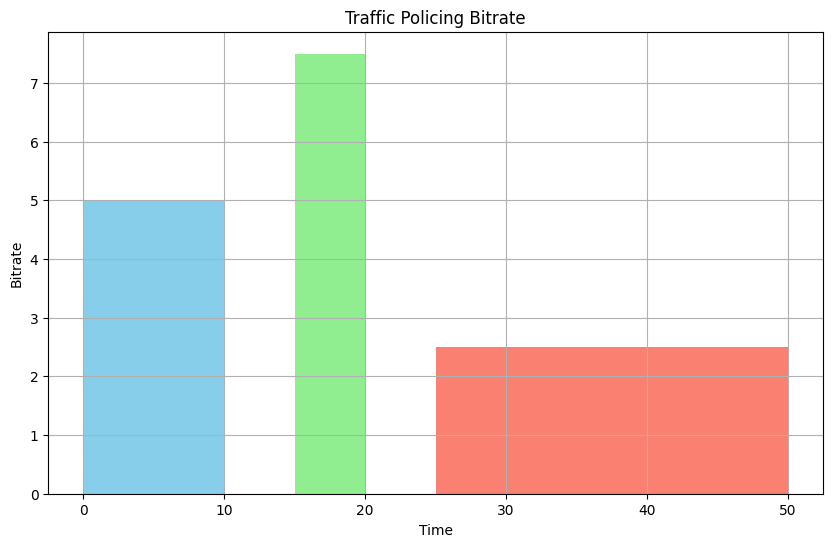

In [94]:
plt.figure(figsize=(10, 6))

colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

for idx, ((start, end), rate) in enumerate(traffic.items()):
    print(start, end, rate)
    color = colors[idx % len(colors)]
    for i in range(int((end - start))):
        plt.bar(int(start + i), rate, width=1, color=color, align='edge')

plt.xlabel('Time')
plt.ylabel('Bitrate')
plt.title('Traffic Policing Bitrate')
plt.grid(True)

plt.show()

---

Traffic policing is a filtering mechanism that checks whether incoming traffic is conforming a Service
Level Agreement (SLA), or non-conforming

---

### Exercise 6

***Make a two-colored graph that shows the parts of in coming traffic that are conforming the SLA in blue, and the non-conforming traffic in red, over time.***

#### Function to Perform Traffic Policing

In [105]:
"""
Function to perform traffic policing with marking
Input:
    traffic: dictionary with the traffic information
    leakRate: leak rate
    burstTolerance: burst tolerance
    timestepSize: timestep size
"""
def trafficPolicing(traffic, leakRate, burstTolerance, timestepSize):
    timeArray = []
    unmarkedTraffic = []
    trafficRate = []
    remainingTokensarray = []
    waterlevelArray = []

    currentTime = 0.0
    totalWaterLevel = 0.0
    traffic = sorted(traffic.items())

    for (start, end), rate in traffic:
        remainingTokens = burstTolerance

        # Handle time before the start of the current traffic interval
        while currentTime < start:
            timeArray.append(currentTime)
            trafficRate.append(0.0)
            unmarkedTraffic.append(0.0)
            remainingTokensarray.append(remainingTokens)
            waterlevelArray.append(totalWaterLevel)

            currentTime = np.round(currentTime + timestepSize, 1)
            remainingTokens = min(burstTolerance, remainingTokens + leakRate * timestepSize)

            totalWaterLevel = max(0.0, totalWaterLevel - leakRate * timestepSize)

        # Handle time during the current traffic interval
        while currentTime < end:
            timeArray.append(currentTime)
            trafficRate.append(rate)
            remainingTokensarray.append(remainingTokens)
            waterlevelArray.append(totalWaterLevel)

            currentTraffic = rate * timestepSize

            # Check if all of the current traffic can be sent
            if currentTraffic > remainingTokens:
                unmarkedTraffic.append(leakRate)
                remainingTokens -= leakRate * timestepSize

                totalWaterLevel += leakRate * timestepSize
            else:
                unmarkedTraffic.append(rate)
                remainingTokens -= currentTraffic

                totalWaterLevel += currentTraffic

            remainingTokens = min(burstTolerance, remainingTokens + leakRate * timestepSize)
            totalWaterLevel = max(0.0, totalWaterLevel - leakRate * timestepSize)

            currentTime = np.round(currentTime + timestepSize, 1)

    return timeArray, unmarkedTraffic, trafficRate, remainingTokensarray, waterlevelArray
"""
Output:
    timeArray: time array
    unmarkedTraffic: unmarked traffic array
    trafficRate: traffic rate array
    remainingTokensarray: remaining tokens array
"""

'\nOutput:\n    timeArray: time array\n    unmarkedTraffic: unmarked traffic array\n    trafficRate: traffic rate array\n    remainingTokensarray: remaining tokens array\n'

In [106]:
policingTime, policingUnmarked, policingTrafficRate, tokensArray, waterlevelArray = trafficPolicing(traffic, leakRate, burstTolerance, timestepSize)

print("Time Array: ", policingTime)
print("Unmarked Traffic: ", policingUnmarked)
print("Traffic Rate: ", policingTrafficRate)
print("Remaining Tokens: ", tokensArray)
print("Water Level: ", waterlevelArray)


#for i in range(len(policingTime)):
#    print(policingTime[i], policingUnmarked[i], policingTrafficRate[i])

Time Array:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 

#### Plot the Marked Traffic from Traffic Policing

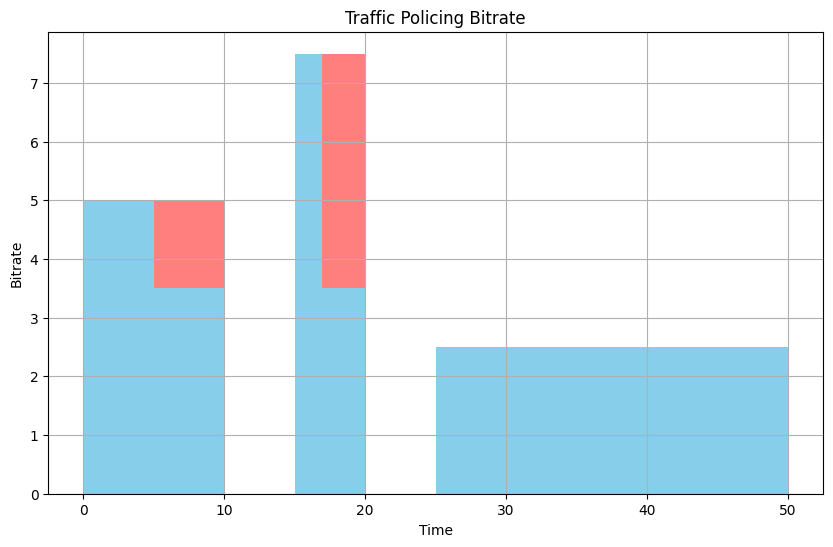

In [107]:
plt.figure(figsize=(10, 6))

plt.bar(policingTime, policingTrafficRate, width=timestepSize, color='red', align='edge', alpha=0.5)
plt.bar(policingTime, policingUnmarked, width=timestepSize, color='skyblue', align='edge')

plt.xlabel('Time')
plt.ylabel('Bitrate')
plt.title('Traffic Policing Bitrate')
plt.grid(True)

plt.show()

#### Plot the Number of Tokens available over time

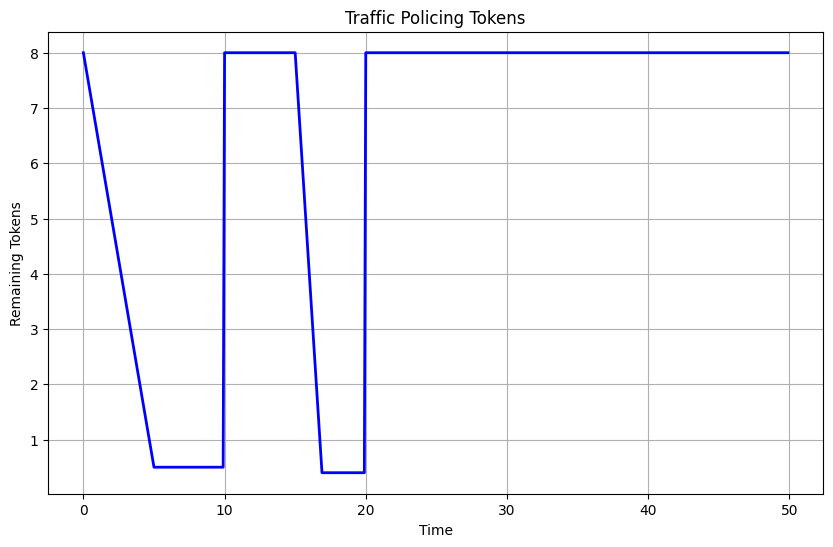

In [108]:
plt.figure(figsize=(10, 6))

plt.plot(policingTime, tokensArray, color='blue', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Remaining Tokens')
plt.title('Traffic Policing Tokens')
plt.grid(True)

plt.show()

#### Plot the "Water Volume" of the "Bucket"

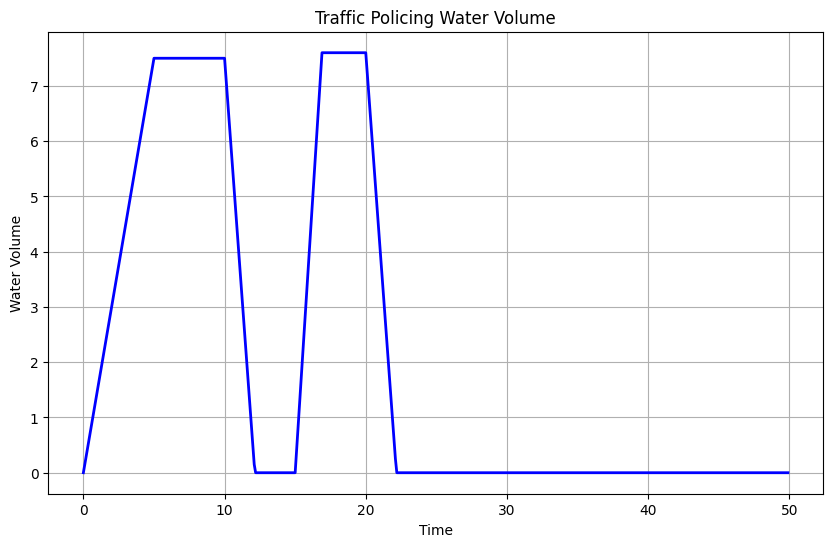

In [109]:
plt.figure(figsize=(10, 6))

plt.plot(policingTime, waterlevelArray, color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Water Volume')
plt.title('Traffic Policing Water Volume')
plt.grid(True)

plt.show()

---

### Exercise 7

**Answer the same questions as in questions 5 and 6, but where the leak rate and shaping rate are now
1.75 Mbit/s (instead of 3.5 Mbit/s).**

#### Parameters

In [80]:
shapingRate = 1.75

leakRate2 = 1.75

burstTolerance2 = 8

timestepSize = 0.1

#### Shape Traffic

In [81]:
shapedTraffic3 = trafficShaping(traffic, shapingRate)

print("Shaped Traffic: ", shapedTraffic3)

Shaped Traffic:  [((0, 28.571428571428573), 1.75), ((28.571428571428573, 50.0), 1.75), ((50.0, 85.71428571428572), 1.75)]


In [82]:
dictShapedTraffic3 = {timespan: rate for timespan, rate in shapedTraffic3}

print("Dict Shaped Traffic: ", dictShapedTraffic3)

Dict Shaped Traffic:  {(0, 28.571428571428573): 1.75, (28.571428571428573, 50.0): 1.75, (50.0, 85.71428571428572): 1.75}


In [83]:
policingTime2, policingUnmarked2, policingTrafficRate2, tokensArray2, waterlevelArray2 = trafficPolicing(dictShapedTraffic3, leakRate2, burstTolerance2, timestepSize)

print("Time Array: ", policingTime2)
print("Unmarked Traffic: ", policingUnmarked2)
print("Traffic Rate: ", policingTrafficRate2)
print("Remaining Tokens: ", tokensArray2)

Time Array:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 

#### Plot the Marked Traffic from Traffic Policing

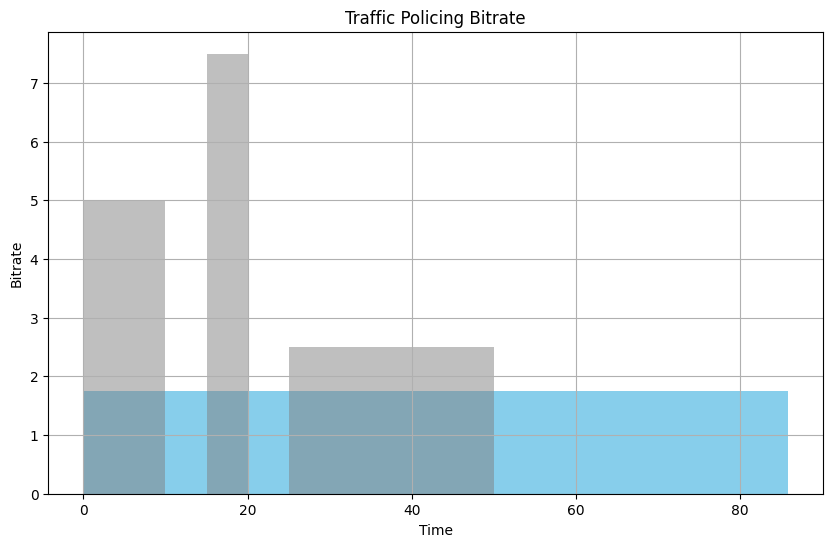

In [84]:
plt.figure(figsize=(10, 6))

plt.bar(policingTime2, policingTrafficRate2, width=timestepSize, color='red', align='edge', alpha=0.5)
plt.bar(policingTime2, policingUnmarked2, width=timestepSize, color='skyblue', align='edge')

for (start, end), rate in traffic.items():
    for i in range(int((end - start))):
        plt.bar(int(start + i), rate, width=1, color='gray', align='edge', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Bitrate')
plt.title('Traffic Policing Bitrate')
plt.grid(True)

plt.show()

#### Plot the Number of Tokens available over time

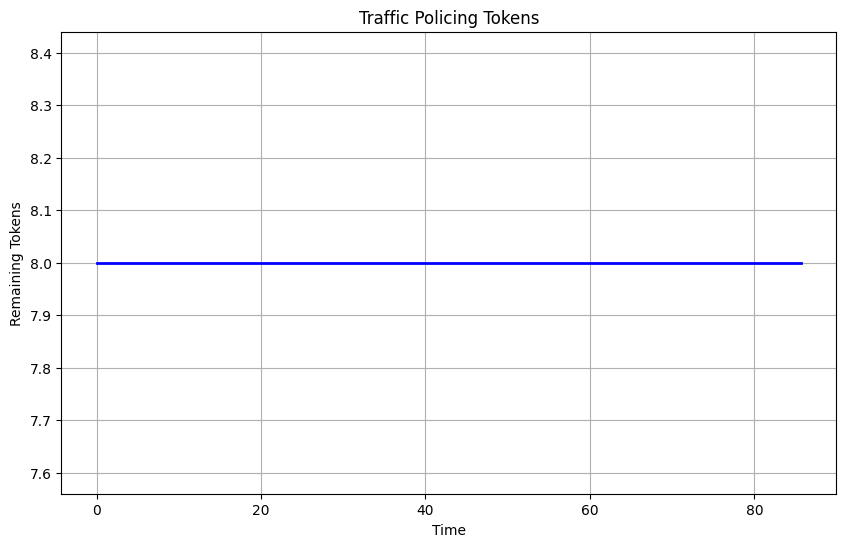

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(policingTime2, tokensArray2, color='blue', linewidth=2)

plt.xlabel('Time')
plt.ylabel('Remaining Tokens')
plt.title('Traffic Policing Tokens')
plt.grid(True)

plt.show()

#### Plot the "Water Volume" of the "Bucket"

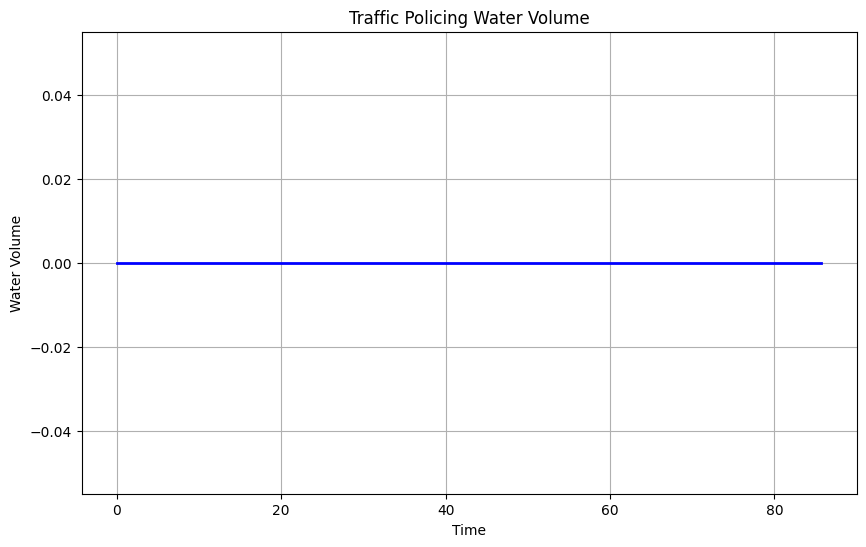

In [85]:
plt.figure(figsize=(10, 6))

plt.plot(policingTime2, waterlevelArray2, color='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Water Volume')
plt.title('Traffic Policing Water Volume')
plt.grid(True)

plt.show()

---

## II : Performance of TCP-based networks

During the lectures, we have discussed how the TCP protocol works, including the evolution of the
congestion window, acknowledgements, TCP Slow Start, etc. 

![Figure 3](3.png)


---

### Exercise 8

**What is the main downside of TCP Slow Start?**

TCP Slow Start as a Congestion Control mechanism prevents network congestion by gradually increasing the amount of data sent over the network over time, but this process has some downsides. The greatest downside is one that stems from the very structure of the system in which the slow start begins with a small congestion window, meaning the traffic cannot maximize the usage of available bandwidth immediately. This issue may be mitigated with a larger initial congestion window size or the implementation of TCP Fast open to allow data to be sent simultaneously with the handshake phase.

---

Suppose that we want to transfer a file from Amsterdam and Atlanta, GA, over a long-distance transatlantic
TCP-connection with the following characteristics: RTT = 60ms, receive CW size = 256KB, bandwidth =
200 Mbit/s, MSS = 1460 Bytes, and where the request processing time to generate response = 50ms.


#### Parameters

In [29]:
roundTripTime = 0.06 # 60ms to seconds
congWind = 256 # 256KB
bandwidth = 24414.0625 # 200Mbits/s to Kilobytes
maxSegSize = 1.426 # 1460 Bytes to Kilobytes
procTime = 0.05 # 50ms to seconds

---

### Exercise 9

**For file sizes 15KBytes, 25KBytes and 40KBytes, calculate the transfer time when the initial CW size is 1 segment, assuming that the transfer starts off with a three-way handshake, and is completely processed in Slow Start**

#### Transfer Time Calculations

Converting all units to seconds and Kilobytes...

Round Trip time = $0.06$ seconds

Congestion Window = $256$ KB

Bandwidth = $24414.0625$ KB/sec

Maximum Segment Size = $1.426$ KB

Processing Time = $0.05$ seconds

Three-way handshake = $1.5$ Roundtrips = $0.09$ seconds

With TCP Fast Open, the client sends the `get` request along with the ACK, thus incuring only $1$ RTT

Slow Start: 
- 1 RTT : 1 MSS
- 2 RTT : 2 MSS + 1 MSS = 3 MSS
- 3 RTT : 4 MSS + 2 MSS + 1 MSS = 7 MSS
- 4 RTT : 8 MSS + 4 MSS + 2 MSS + 1 MSS = 15 MSS
- 5 RTT : 16 MSS + 8 MSS + 4 MSS + 2 MSS + 1 MSS = 31 MSS

##### **15 KBytes**

Number of Segments = File Size/MSS = $15/1.426 \approx 11$

$11$ Segments requires $4$ roundtrips given an initial conditon window of $1$ MSS

The time for $4$ roundtrips is $0.06 \times 4 = 0.24$

The total transfer time is the sum of...
- Three Way Handshake = $0.09$
- Request Processing Time = $0.05$
- Slow Start Time = $0.24$

$$\text{Transfer Time } = 0.09+0.05+0.24 = 0.38 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.06$ seconds

$$\text{Transfer Time } = 0.06+0.05+0.24 = 0.35 \text{ seconds}$$

##### **25 KBytes**

Number of Segments = File Size/MSS =  $25/1.426 \approx 18$

$18$ Segments requires $5$ roundtrips given an initial conditon window of $1$ MSS

The time for $5$ roundtrips is $0.06 \times 5 = 0.3$

The total transfer time is the sum of...
- Three Way Handshake = $0.09$
- Request Processing Time = $0.05$
- Slow Start Time = $0.3$

$$\text{Transfer Time } = 0.09+0.05+0.3 = 0.44 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.06$ seconds

$$\text{Transfer Time } = 0.06+0.05+0.3 = 0.41 \text{ seconds}$$

##### **40 KBytes**

Number of Segments = File Size/MSS =  $40/1.426 \approx 29$

$29$ Segments requires $5$ roundtrips given an initial conditon window of $1$ MSS

The time for $5$ roundtrips is $0.06 \times 5 = 0.3$

The total transfer time is the sum of...
- Three Way Handshake = $0.09$
- Request Processing Time = $0.05$
- Slow Start Time = $0.3$

$$\text{Transfer Time } = 0.09+0.05+0.3 = 0.44 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.06$ seconds

$$\text{Transfer Time } = 0.06+0.05+0.3 = 0.41 \text{ seconds}$$

---

### Exercise 10

**Answer the same questions (as in question 8), but now assuming that the initial CW size of the TCP connection is two segments**

#### Transfer Time Calculations

Slow Start: 
- 1 RTT : 2 MSS
- 2 RTT : 4 MSS + 2 MSS = 6 MSS
- 3 RTT : 8 MSS + 4 MSS + 2 MSS = 14 MSS
- 4 RTT : 16 MSS + 8 MSS + 4 MSS + 2 MSS = 30 MSS

##### **15 KBytes**

Number of Segments = File Size/MSS = $15/1.426 \approx 11$

$11$ Segments requires $3$ roundtrips given an initial conditon window of $2$ MSS

The time for $3$ roundtrips is $0.06 \times 3 = 0.18$

The total transfer time is the sum of...
- Three Way Handshake = $0.09$
- Request Processing Time = $0.05$
- Slow Start Time = $0.18$

$$\text{Transfer Time } = 0.09+0.05+0.18 = 0.32 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.06$ seconds

$$\text{Transfer Time } = 0.06+0.05+0.18 = 0.29 \text{ seconds}$$

##### **25 KBytes**

Number of Segments = File Size/MSS =  $25/1.426 \approx 18$

$18$ Segments requires $5$ roundtrips given an initial conditon window of $2$ MSS

The time for $4$ roundtrips is $0.06 \times 4 = 0.24$

The total transfer time is the sum of...
- Three Way Handshake = $0.09$
- Request Processing Time = $0.05$
- Slow Start Time = $0.24$

$$\text{Transfer Time } = 0.09+0.05+0.24 = 0.38 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.06$ seconds

$$\text{Transfer Time } = 0.06+0.05+0.24 = 0.35 \text{ seconds}$$

##### **40 KBytes**

Number of Segments = File Size/MSS =  $40/1.426 \approx 29$

$29$ Segments requires $5$ roundtrips given an initial conditon window of $2$ MSS

The time for $4$ roundtrips is $0.06 \times 4 = 0.24$

The total transfer time is the sum of...
- Three Way Handshake = $0.09$
- Request Processing Time = $0.05$
- Slow Start Time = $0.24$

$$\text{Transfer Time } = 0.09+0.05+0.24 = 0.38 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.06$ seconds

$$\text{Transfer Time } = 0.06+0.05+0.24 = 0.35 \text{ seconds}$$

---

### Exercise 11

**Answer the same question (as in question 9), but now assuming that the RTT is doubled to 120ms (instead of 60 ms).**


#### Transfer Time Calculations

Converting all units to seconds and Kilobytes...

Round Trip time = $0.12$ seconds

Congestion Window = $256$ KB

Bandwidth = $24414.0625$ KB/sec

Maximum Segment Size = $1.426$ KB

Processing Time = $0.05$ seconds

Three-way handshake = $1.5$ Roundtrips = $0.18$ seconds

With TCP Fast Open, the client sends the `get` request along with the ACK, thus incuring only $1$ RTT

Slow Start: 
- 1 RTT : 1 MSS
- 2 RTT : 2 MSS + 1 MSS = 3 MSS
- 3 RTT : 4 MSS + 2 MSS + 1 MSS = 7 MSS
- 4 RTT : 8 MSS + 4 MSS + 2 MSS + 1 MSS = 15 MSS
- 5 RTT : 16 MSS + 8 MSS + 4 MSS + 2 MSS + 1 MSS = 31 MSS

##### **15 KBytes**

Number of Segments = File Size/MSS = $15/1.426 \approx 11$

$11$ Segments requires $4$ roundtrips given an initial conditon window of $1$ MSS

The time for $4$ roundtrips is $0.12 \times 4 = 0.48$

The total transfer time is the sum of...
- Three Way Handshake = $0.18$
- Request Processing Time = $0.05$
- Slow Start Time = $0.48$

$$\text{Transfer Time } = 0.18+0.05+0.48 = 0.71 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.06$ seconds

$$\text{Transfer Time } = 0.12+0.05+0.48 = 0.65 \text{ seconds}$$

##### **25 KBytes**

Number of Segments = File Size/MSS =  $25/1.426 \approx 18$

$18$ Segments requires $5$ roundtrips given an initial conditon window of $1$ MSS

The time for $5$ roundtrips is $0.12 \times 5 = 0.60$

The total transfer time is the sum of...
- Three Way Handshake = $0.18$
- Request Processing Time = $0.05$
- Slow Start Time = $0.6$

$$\text{Transfer Time } = 0.18+0.05+0.6 = 0.83 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.12$ seconds

$$\text{Transfer Time } = 0.12+0.05+0.6 = 0.77 \text{ seconds}$$

##### **40 KBytes**

Number of Segments = File Size/MSS =  $40/1.426 \approx 29$

$29$ Segments requires $5$ roundtrips given an initial conditon window of $1$ MSS

The time for $5$ roundtrips is $0.12 \times 5 = 0.60$

The total transfer time is the sum of...
- Three Way Handshake = $0.18$
- Request Processing Time = $0.05$
- Slow Start Time = $0.6$

$$\text{Transfer Time } = 0.18+0.05+0.6 = 0.83 \text{ seconds}$$

With TCP Fast Open, the initial handshake is reduced to $1$ RTT $= 0.12$ seconds

$$\text{Transfer Time } = 0.12+0.05+0.6 = 0.77 \text{ seconds}$$

---

### Exercise 12

**Use insights obtained in questions 8, 9 and 10 to give a formula that expresses the transfer time (in
Slow Start, and including the three-way handshake) in terms of the file size, the RTT, the MSS and the
server processing times (both the receive CW size and the bandwidth are assumed to be very large
such that they do not play a role).**

#### Parameters

##### Known

$R$ : Roundtrip Time

$M$ : Maximum Segment Size

$P$ : Processing Time

$F$ : File Size

$C$ : Initial Congestion Window

##### Unknown

$S$ : Number of segments required for the file $F$

$N$ : Number of Roundtrips required for files transfer

$H_{SS}$ : Three-way Handshake Slow Start

$H_{FO}$ : TCP Fast-Open

$T_{SS}$ : Total Transfer Time with Three-Way Handshake

$T_{FO}$ : Total Transfer Time with TCP Fast Open

#### Three-Way Handshake Time

$$H_{SS} = 1.5 \cdot R$$

$$H_{FO} = 1.0 \cdot R$$

#### Number of Segments required
Rounding to the next highest whole number...


$$S = \frac{F}{M}$$

#### Number of Round Trips required for $S$ Segments of $M$ size

Find $N$ roundtrips such that...

$$\sum_{n=1}^N 2^{n-1} \cdot C \geq S$$

#### Total Transfer time for file of size $F$

$$T_{SS} = H_{SS} + P + (N \cdot R)$$

$$T_{FO} = H_{FO} + P + (N \cdot R)$$

#### Approximating the Number of Round Trips $N$ required for $S$ Segments

By approximating the equation for the number of roundtrips required for $S$ segments of $M$ size, the formula may be adjusted to be inserted into the Total Transfer Time Equation.

$$\sum_{n=1}^N 2^{n-1} \cdot C \geq S$$

$$C \cdot \sum_{n=1}^N 2^{n-1} \geq S$$

$\sum_{n=1}^N 2^{n-1}$ is a geometric series where $a_1 = 1$ such that...

$$\frac{2^N - 1}{2-1} = 2^N-1$$

$$(2^{N} - 1) \cdot C \geq S$$

Where $C > 0$...

$$2^{N} - 1 \geq \frac{S}{C}$$

$$2^{N} \geq \frac{S}{C} + 1$$

$$N \geq \log_2 (\frac{S}{C} + 1)$$

This gives $N$ roundtrips to be rounded up to the next highest whole number, but to better fit into the Total Transfer Time Equation, this may be approximated by adding $1$ to $N$ such that 

$$N \geq \log_2 (\frac{S}{C} + 1) + 1$$

Which may be approximated such that

$$N \geq \log_2 (\frac{S}{C}) + 1$$

To find the time to send $S$ segments in $N$ roundtrips, multiply by the RTT $R$:

$$T_N = (\log_2 (\frac{S}{C}) + 1) \cdot R$$

... which matches the known equation for the imte needed to download and acknowledge $n$ packets:

$$ R(n) = [log_2(\frac{n}{CW_{init}}) + 1] \cdot RTT$$

#### Updated Total Transfer Time Formulae

$$T_{SS} = 1.5 R + P + (\log_2 (\frac{S}{C}) + 1) R$$

$$T_{FO} = 1.0 R + P + (\log_2 (\frac{S}{C}) + 1) R$$